Number of test periods: 4770
Calculating BIC periodogram for 1 planets vs. 0 planets


  0%|          | 0/4770 [00:38<?, ?it/s] 92.63it/s] 


RV multi-panel plot saved to /mnt/c/Users/justv/Desktop/Workspace/Exoplanet/lightkurveandexoplanet/KOI6194/orbit_plot1.pdf
Number of test periods: 4770
Calculating BIC periodogram for 2 planets vs. 1 planets


  0%|          | 0/4770 [02:14<?, ?it/s] 11.65it/s]


RV multi-panel plot saved to /mnt/c/Users/justv/Desktop/Workspace/Exoplanet/lightkurveandexoplanet/KOI6194/orbit_plot2.pdf
Number of test periods: 4770
Calculating BIC periodogram for 3 planets vs. 2 planets


  0%|          | 0/4770 [05:11<?, ?it/s]  3.46it/s]


RV multi-panel plot saved to /mnt/c/Users/justv/Desktop/Workspace/Exoplanet/lightkurveandexoplanet/KOI6194/orbit_plot3.pdf
Number of test periods: 4770
Calculating BIC periodogram for 4 planets vs. 3 planets


  0%|          | 0/4770 [10:29<?, ?it/s]  1.99it/s]


RV multi-panel plot saved to /mnt/c/Users/justv/Desktop/Workspace/Exoplanet/lightkurveandexoplanet/KOI6194/orbit_plot3.pdf


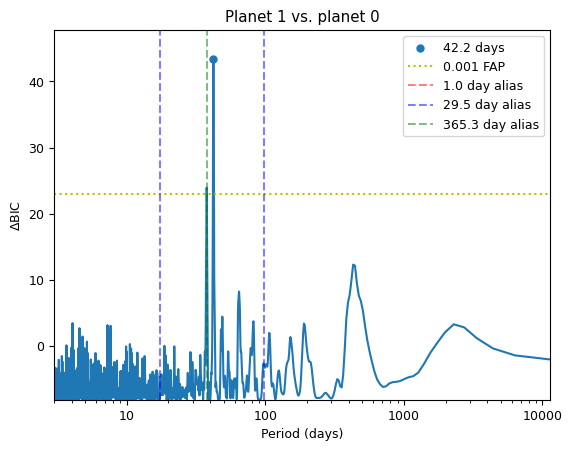

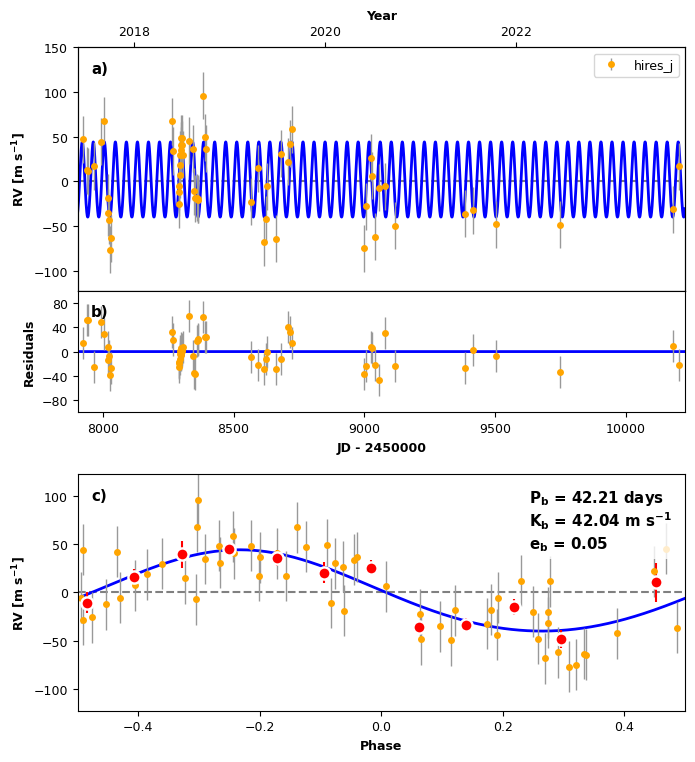

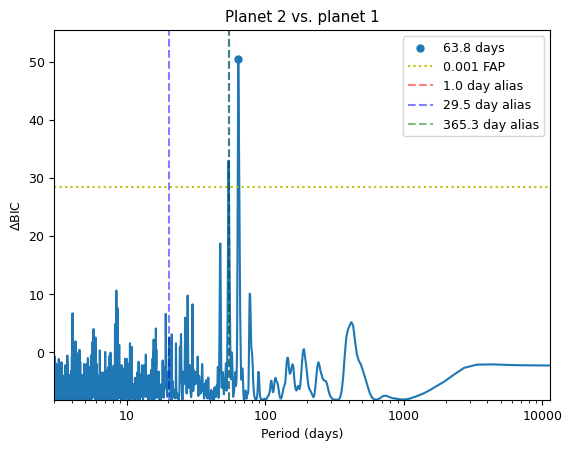

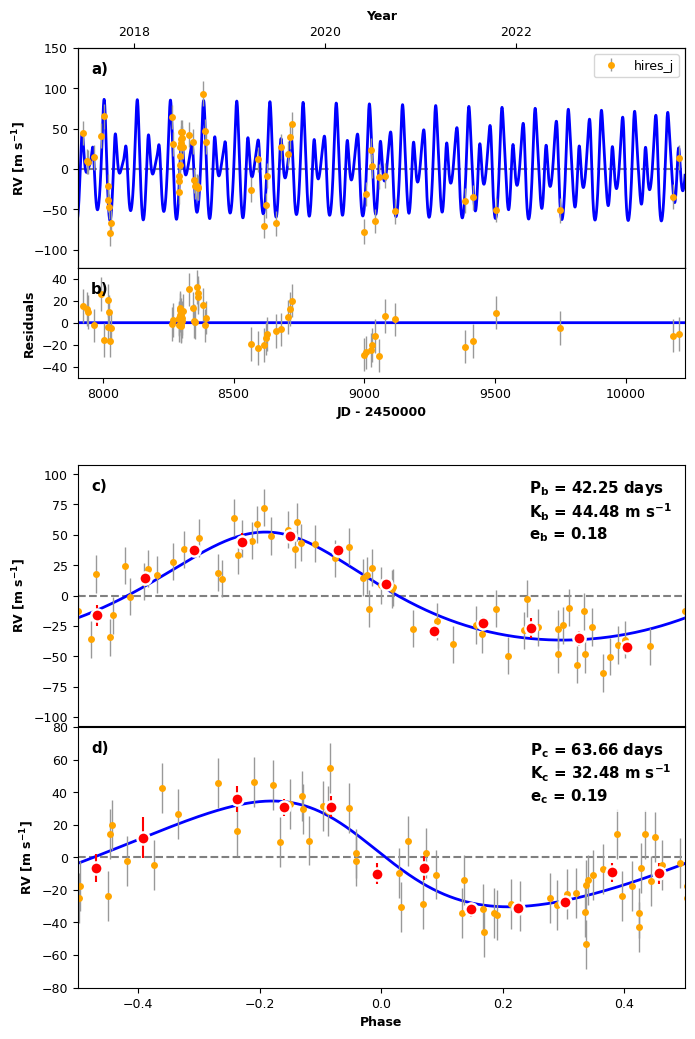

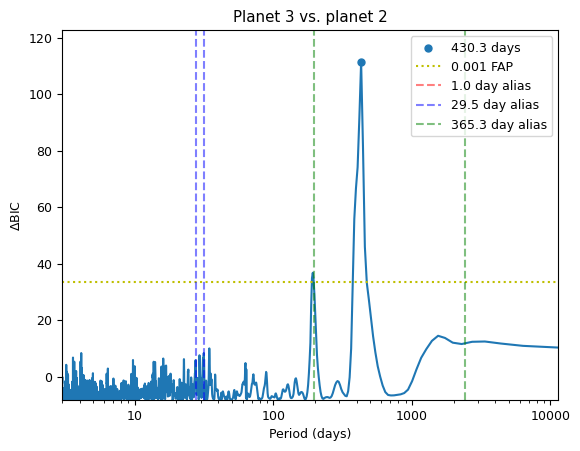

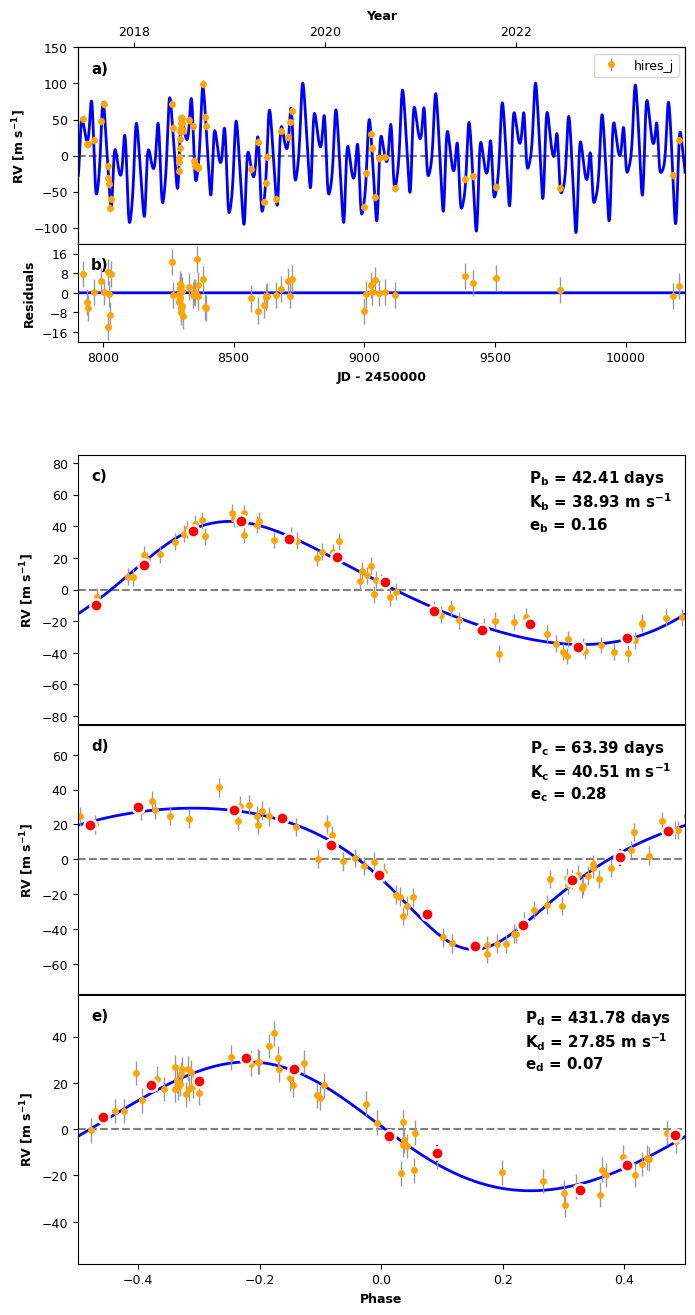

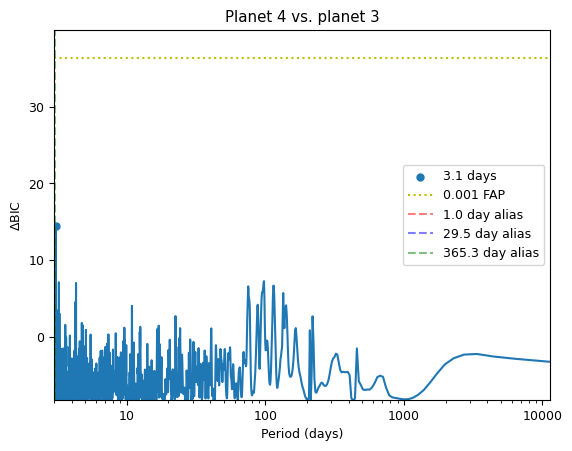

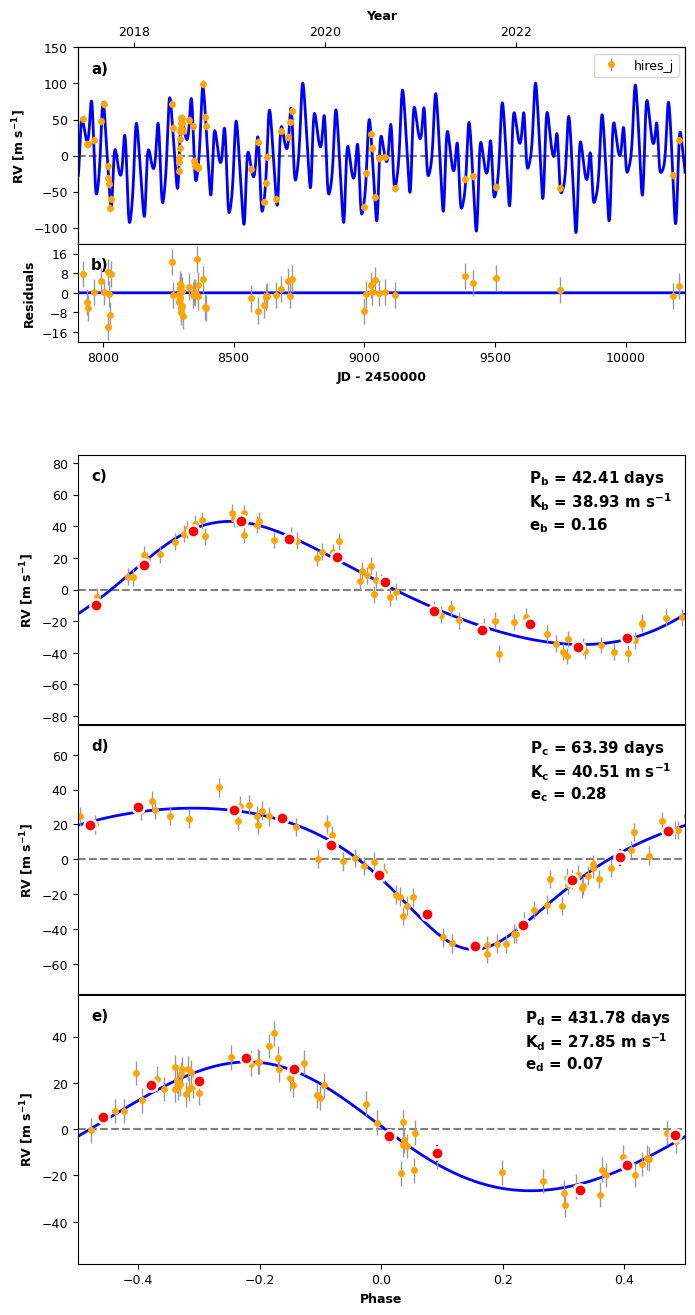

In [1]:
import os
import rvsearch
from rvsearch import search, utils #type: ignore
import numpy as np, matplotlib.pyplot as plt, astropy.stats, matplotlib.ticker as ticker
import pandas as pd, pickle

data = utils.read_from_csv('k06194_rv_mod_rvsearch.csv')
# print(data)
searcher = search.Search(data, starname='KOI6194',max_planets=4,max_per = 1000,
                         workers=8, mcmc=False, verbose=True)
searcher.run_search()
# with open('post_final.pkl','rb') as f:
#     data = pickle.load(f)
# data.params

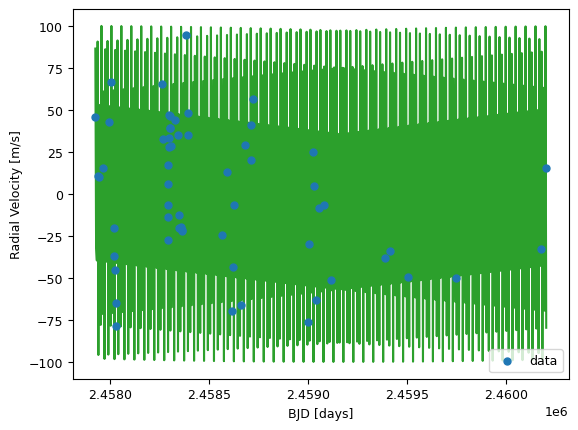

In [5]:
from scipy import optimize
from IPython.display import display,Math
import numpy as np, pandas as pd, matplotlib.pyplot as plt

data = pd.read_csv('k06194_rv_mod_cull.csv')
def test_fun(x,amp):
    return amp * np.cos(x)
# rv(t) = A * np.cos(omega*t+phi), set parameters for omega, phi and A
t= np.linspace(min(data.time),max(data.time),10*len(data.time))
plt.scatter(data.time,data.mnvel, label='data')
plt.plot(t, test_fun(t,100),color="C2",zorder=-1000)
plt.xlabel("BJD [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend(loc='lower right')
plt.show()
# for i in range(100):
#     plt.plot(t,test_fun(t,100,i),color="C2",zorder=-1000,label='ω={:.2f}'.format(i))
#     loc, scale = np.mean(data.time), np.std(data.time, ddof=1)
#     cdf = stats.norm(loc, scale).cdf
#     stats.ks_1samp(data.time, cdf)

In [ ]:
# n = len(test_fun(t,100))
# k = np.arange(n)
# duration = len(data.time)
# N = fs * len(t)
# T = n/fs
# freq = k/T
# freq = freq[:len(freq)//2] #freq. in Hz
# periods = freq**(-1)
import scipy.fft as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

Days = np.array(data.time)
RV = np.array(data.mnvel)
Fit = test_fun(t,100)

N = Days.shape[0]
# X = sf.rfft(RV) / N
X = sf.rfft(test_fun(t,100))/N
freqs = sf.rfftfreq(n=N, d=len(test_fun(t,100))/(5*12)) # unit = 1/12 of sampling period
# Plot signal
fig, axes = plt.subplots(figsize=(15,3), ncols=2)
ax=axes[0]
ax.scatter(t, test_fun(t,100))
# ax.xaxis.set_major_locator(tck.MultipleLocator(50))
ax.set_xlabel('BJD [days]')
ax.set_ylabel('Radial Velocity [m/s]')
#ax.grid()

# Plot DFT
ax=axes[1]
ax.set_xlabel('period, years')
ax.set_ylabel('power')
ax.stem(freqs, abs(X)[:30])
ticks = ax.get_xticks()
# ax.set_xticklabels([f'{1/tick:.1f}' if tick!=0 else '$\infty$' for tick in ticks])
# ax.invert_xaxis()
ax.grid()

In [ ]:
fs =len(data.time)/60 # sampling rate (# of samples in 5 years)
fourier = np.fft.rfft(test_fun(t,100)) # real component of FT, only have real values in data
freqs = np.fft.rfftfreq(len(t), d=fs) # Frequency range in units of samples/year
power = np.abs(fourier) # power spectrum

fig, axes = plt.subplots(figsize = (15,3), ncols=2)
ax = axes[0]
ax.plot(freqs,power) # plotting the power spectrum
ax.set_xlabel('1/Year')
ax.set_ylabel('Power')
_ = ax.set_xlim(0,max(freqs))
ax.grid(True)
ax = axes[1]
ax.set_xlabel('period, years')
ax.stem(freqs, power)
ticks = ax.get_xticks()
# ax.set_xticklabels([f'{1/tick:.1f}' if tick!=0 else '$\infty$' for tick in ticks])
ax.invert_xaxis()
ax.grid()